In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        #print(os.path.join(dirname, filename))
        pass

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
!pip install timm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:000:00:010:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.8 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 3.1 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 5.3 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.7 MB/s eta 0:00:00:00:01m00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 68.4 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.9.41
    Uninstalling nvidia-nvjitlink-cu12-12.9.41:
      Successfully uninstalled nvidia-nvjitlink-cu12-12.9.41
  Attempting uninstall: nvidia-curand-cu12
    Found existing installation: nvidia-curand-cu12 10.3.10.19
    Uninstalling nvidia-curand-cu12-

In [2]:
import timm
print(f"timm version: {timm.__version__}")

# Check available ViT models
available_vit_models = timm.list_models('vit*')
print(f"\nAvailable ViT models: {len(available_vit_models)}")
print("Some popular options:")
for model in ['vit_base_patch16_224', 'vit_large_patch16_224', 'vit_small_patch16_224']:
    if model in available_vit_models:
        print(f"✓ {model}")

timm version: 1.0.15

Available ViT models: 168
Some popular options:
✓ vit_base_patch16_224
✓ vit_large_patch16_224
✓ vit_small_patch16_224


In [3]:
import shutil
SOURCE_DIR = '/kaggle/input'

In [4]:
import torch
from torch import nn
from pathlib import Path
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import random
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import os
import seaborn as sns

import pandas as pd
from collections import Counter
%matplotlib inline

## Remove Corrupted Image and Working with Kaggle Env

In [7]:
def copy_and_clean_dataset(source_path, dest_path):
    """
    Copy dataset from read-only input to working directory and remove corrupted images
    """
    
    print(f"📂 Copying dataset from {source_path} to {dest_path}")
    
    # Copy the entire dataset
    if os.path.exists(dest_path):
        shutil.rmtree(dest_path)
    
    shutil.copytree(source_path, dest_path)
    print("✅ Dataset copied successfully")
    
    # Now clean corrupted images
    print("🧹 Cleaning corrupted images...")
    corrupted_count = 0
    
    for root, dirs, files in os.walk(dest_path):
        print(root)
        # Skip unknown directory
        if 'unknown' in str(root):
            print('unknown' in str(root))
            continue
    
        for file in files:
            if file.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp')):
                file_path = os.path.join(root, file)
                try:
                    with Image.open(file_path) as img:
                        img.verify()
                except:
                    print(f"  Removing: {file}")
                    os.remove(file_path)
                    corrupted_count += 1
    print(f"✅ Removed {corrupted_count} corrupted images")
    print(f"📁 Clean dataset ready at: {dest_path}")

In [5]:
image_ = os.path.join(SOURCE_DIR,'car-classification-task/car_dataset_split')
train_ = os.path.join(image_, "training_images")
test_ = os.path.join(image_, "testing_images")


print(train_, test_, sep = '\n')

/kaggle/input/car-classification-task/car_dataset_split/training_images
/kaggle/input/car-classification-task/car_dataset_split/testing_images


In [8]:
# Usage for Kaggle:
source = image_
dest = "/kaggle/working/car_dataset_split"

copy_and_clean_dataset(source, dest)

📂 Copying dataset from /kaggle/input/car-classification-task/car_dataset_split to /kaggle/working/car_dataset_split
✅ Dataset copied successfully
🧹 Cleaning corrupted images...
/kaggle/working/car_dataset_split
/kaggle/working/car_dataset_split/testing_images
/kaggle/working/car_dataset_split/testing_images/sports
/kaggle/working/car_dataset_split/testing_images/hatchback
/kaggle/working/car_dataset_split/testing_images/truck
/kaggle/working/car_dataset_split/testing_images/bus
/kaggle/working/car_dataset_split/testing_images/pickup
/kaggle/working/car_dataset_split/testing_images/suv
/kaggle/working/car_dataset_split/testing_images/coupe
/kaggle/working/car_dataset_split/testing_images/mpv
  Removing: avanza_0022_avanza-486770325.jpg
/kaggle/working/car_dataset_split/testing_images/sedan
  Removing: accord_0180_accord-1628549743.jpg
/kaggle/working/car_dataset_split/testing_images/unknown
True
/kaggle/working/car_dataset_split/training_images
/kaggle/working/car_dataset_split/training

In [9]:
# Now use the cleaned dataset
image_source = '/kaggle/working/car_dataset_split'
train_dir = os.path.join(image_source, "training_images")
test_dir = os.path.join(image_source, "testing_images")

image_path = image_source
print(train_dir, test_dir, sep = '\n')

/kaggle/working/car_dataset_split/training_images
/kaggle/working/car_dataset_split/testing_images


### Exluding Unknown

In [10]:
unknown_train='/kaggle/working/car_dataset_split/training_images/unknown'
if os.path.exists(unknown_train):
    shutil.rmtree(unknown_train)
    print("🗑️  Removed unknown folder from training")

unknown_test='/kaggle/working/car_dataset_split/testing_images/unknown'
if os.path.exists(unknown_test):
    shutil.rmtree(unknown_test)
    print("🗑️  Removed unknown folder from testing")

🗑️  Removed unknown folder from training
🗑️  Removed unknown folder from testing


## Images of each split

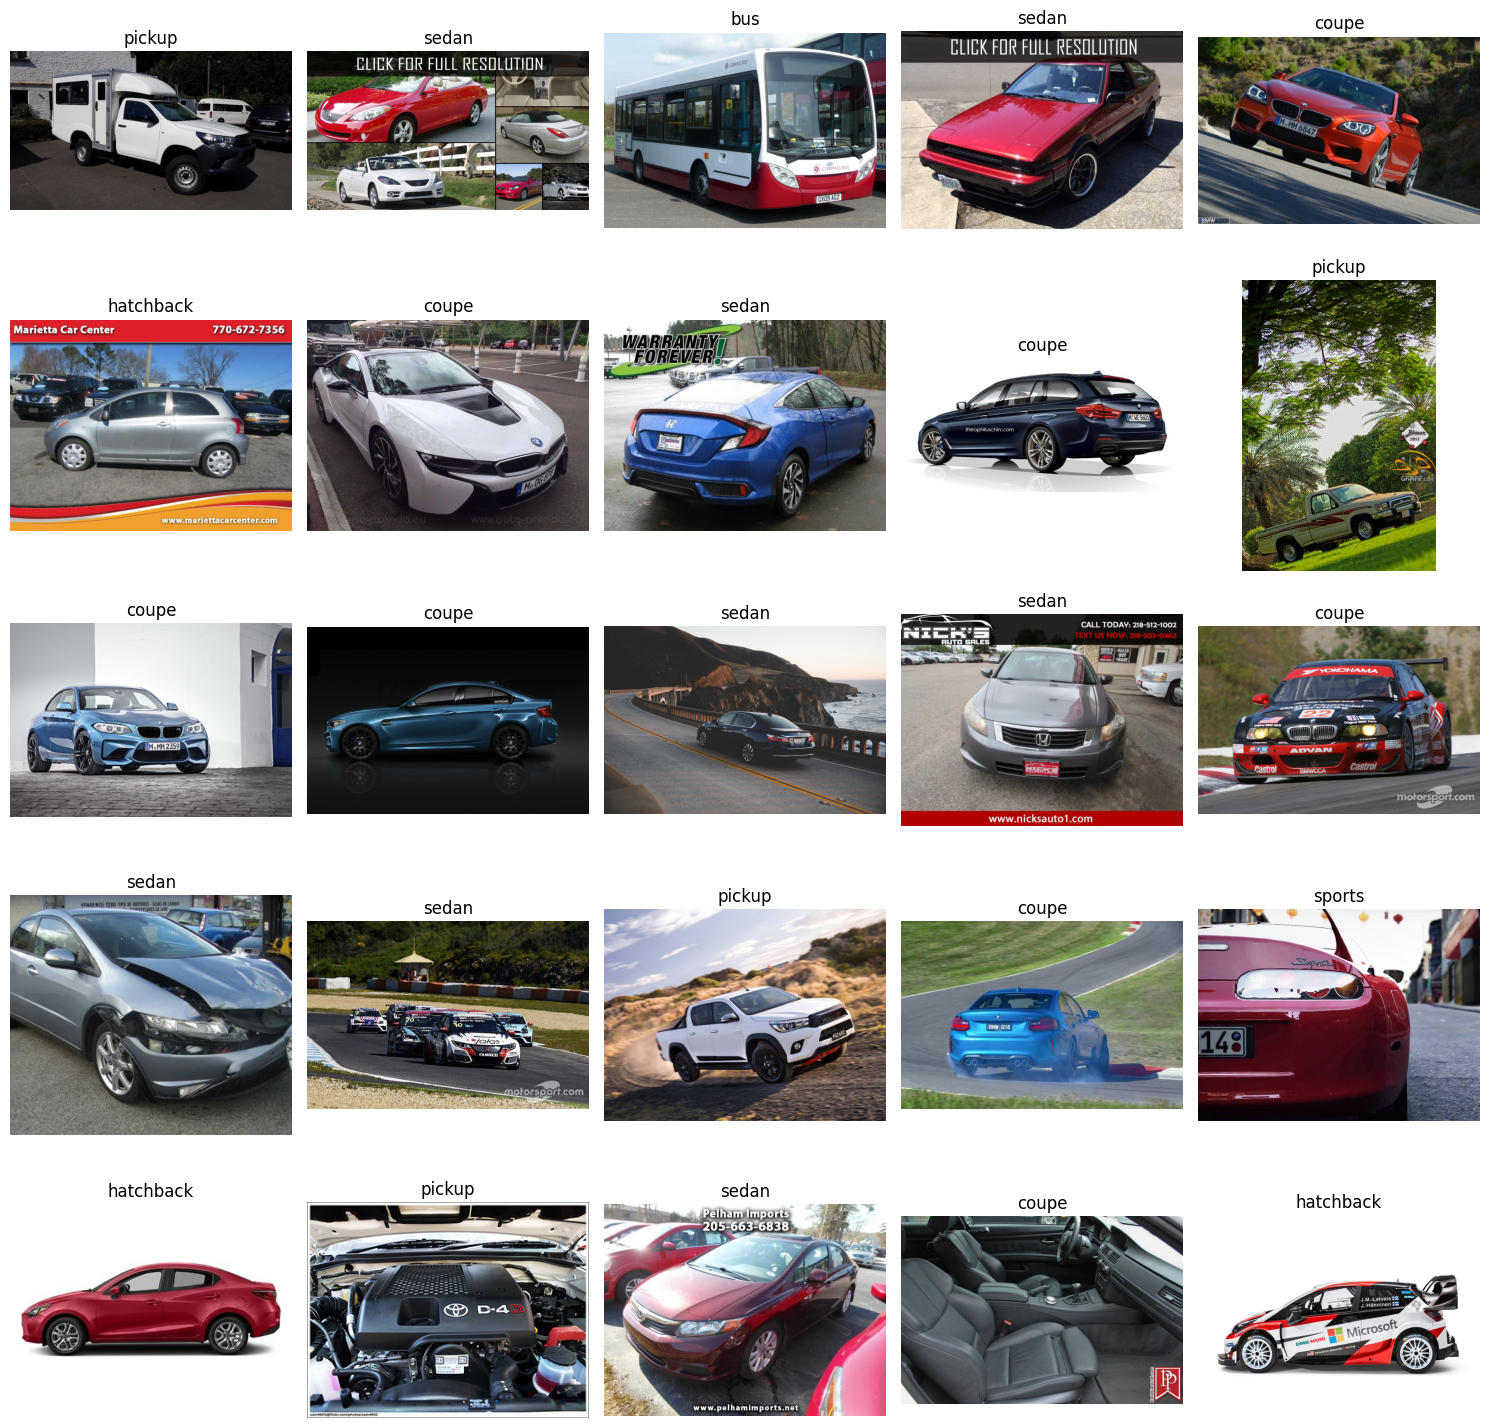

In [11]:
classes = os.listdir(train_dir)
image_paths = []
labels = []

for label in classes:
    class_dir = os.path.join(train_dir, label)
    for img_name in os.listdir(class_dir):
        image_paths.append(os.path.join(class_dir, img_name))
        labels.append(label)

sample_indices = random.sample(range(len(image_paths)), 25)
sample_images = [image_paths[i] for i in sample_indices]
sample_labels = [labels[i] for i in sample_indices]

fig, axes = plt.subplots(5, 5, figsize=(15, 15))
axes = axes.flatten()

for img_path, ax, label in zip(sample_images, axes, sample_labels):
    img = Image.open(img_path)
    ax.imshow(img)
    ax.set_title(label)
    ax.axis('off')

plt.tight_layout()
plt.show()

## Spliting Balance Dataset

In [12]:
def create_balanced_dataset_dataframes(dataset_path, random_seed=42):
    """
    Create balanced train and test dataframes with id | class | image_name format
    Each class will have the same number of examples (minimum count across all classes)
    
    Args:
        dataset_path (str): Path to car_dataset_split directory
        random_seed (int): Random seed for reproducible sampling
        
    Returns:
        tuple: (train_df, test_df)
    """
    
    dataset_path = Path(dataset_path)
    random.seed(random_seed)
    
    def process_split(split_dir):
        """Process a single split (train/test) and return balanced dataframe"""
        data_by_class = {}
        
        if split_dir.exists():
            # First pass: collect all images by class
            for class_folder in split_dir.iterdir():
                if class_folder.is_dir():
                    class_name = class_folder.name
                    images = []
                    
                    for image_file in class_folder.iterdir():
                        if image_file.is_file() and image_file.suffix.lower() in ['.jpg', '.jpeg', '.png', '.bmp', '.tiff', '.webp']:
                            images.append(image_file.name)
                    
                    if images:  # Only add if class has images
                        data_by_class[class_name] = images
            
            # Find minimum count across all classes
            if data_by_class:
                min_count = min(len(images) for images in data_by_class.values())
                print(f"Minimum class count in {split_dir.name}: {min_count}")
                
                # Sample min_count images from each class
                balanced_data = []
                for class_name, images in data_by_class.items():
                    # Randomly sample min_count images
                    sampled_images = random.sample(images, min_count)
                    
                    for image_name in sampled_images:
                        balanced_data.append({
                            'id': len(balanced_data) + 1,
                            'class': class_name,
                            'image_name': image_name
                        })
                
                return pd.DataFrame(balanced_data)
        
        return pd.DataFrame()  # Return empty dataframe if no data
    
    # Process training data
    train_dir = dataset_path / "training_images"
    train_df = process_split(train_dir)
    
    # Process testing data
    test_dir = dataset_path / "testing_images"
    test_df = process_split(test_dir)
    
    # Print class distribution summary
    if not train_df.empty:
        print("\nTraining set class distribution:")
        print(train_df['class'].value_counts().sort_index())
    
    if not test_df.empty:
        print("\nTesting set class distribution:")
        print(test_df['class'].value_counts().sort_index())
    
    return train_df, test_df

In [15]:
# Create balanced datasets
train_df, test_df = create_balanced_dataset_dataframes(image_path, random_seed = 42)

Minimum class count in training_images: 80
Minimum class count in testing_images: 20

Training set class distribution:
class
bus          80
coupe        80
hatchback    80
mpv          80
pickup       80
sedan        80
sports       80
suv          80
truck        80
Name: count, dtype: int64

Testing set class distribution:
class
bus          20
coupe        20
hatchback    20
mpv          20
pickup       20
sedan        20
sports       20
suv          20
truck        20
Name: count, dtype: int64


In [16]:
plt.figure(figsize=(10,8))
sns.countplot(data=train_df, x='class', palette='gnuplot')
plt.title('Number of Images per Class')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)
plt.show()

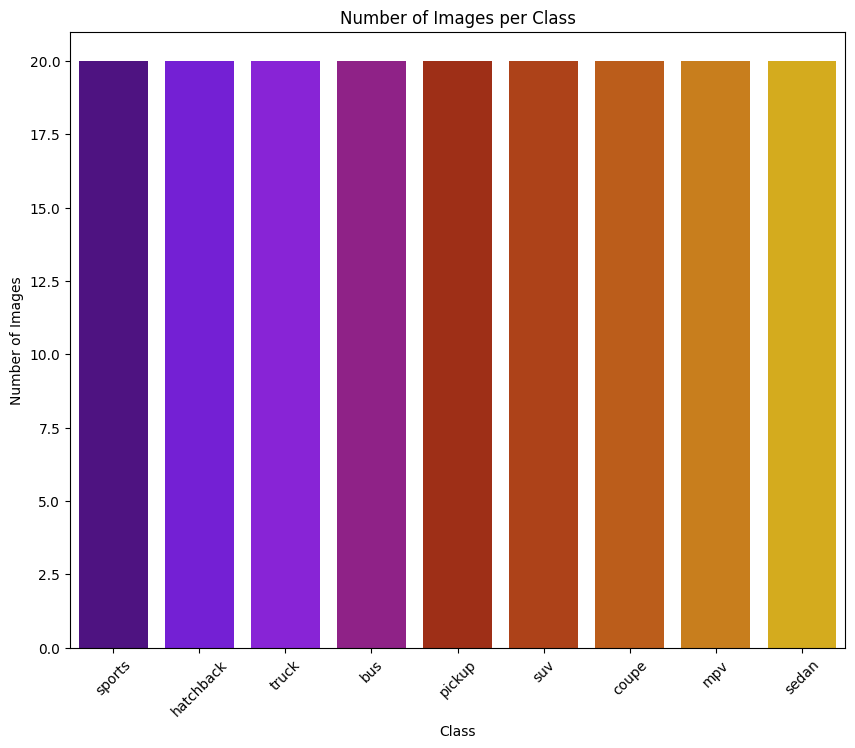

In [17]:
plt.figure(figsize=(10,8))
sns.countplot(data=test_df, x='class', palette='gnuplot')
plt.title('Number of Images per Class')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)
plt.show()

## Image Processing

In [18]:
data_transform=transforms.Compose([transforms.Resize(size=(224,224)),transforms.RandomHorizontalFlip(p=0.5),
                                 transforms.ToTensor()])


data_transform

Compose(
    Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
    RandomHorizontalFlip(p=0.5)
    ToTensor()
)

In [19]:
image_path = Path(image_path)

# Get list of image paths
image_path_list = list(image_path.glob("*/*/*.jpg"))

image_path_list[:10]

[PosixPath('/kaggle/working/car_dataset_split/testing_images/sports/supra_0019_supra-1648294567.jpg'),
 PosixPath('/kaggle/working/car_dataset_split/testing_images/sports/supra_0012_supra-1078091950.jpg'),
 PosixPath('/kaggle/working/car_dataset_split/testing_images/sports/supra_0033_supra-1104343834.jpg'),
 PosixPath('/kaggle/working/car_dataset_split/testing_images/sports/supra_0025_supra-906455791.jpg'),
 PosixPath('/kaggle/working/car_dataset_split/testing_images/sports/supra_0014_supra-1239463086.jpg'),
 PosixPath('/kaggle/working/car_dataset_split/testing_images/sports/supra_0002_supra-2065664713.jpg'),
 PosixPath('/kaggle/working/car_dataset_split/testing_images/sports/supra_0010_supra-1732463316.jpg'),
 PosixPath('/kaggle/working/car_dataset_split/testing_images/sports/supra_0015_supra-996336055.jpg'),
 PosixPath('/kaggle/working/car_dataset_split/testing_images/sports/supra_0024_supra-2031510691.jpg'),
 PosixPath('/kaggle/working/car_dataset_split/testing_images/sports/supra_0

### Image Transformation

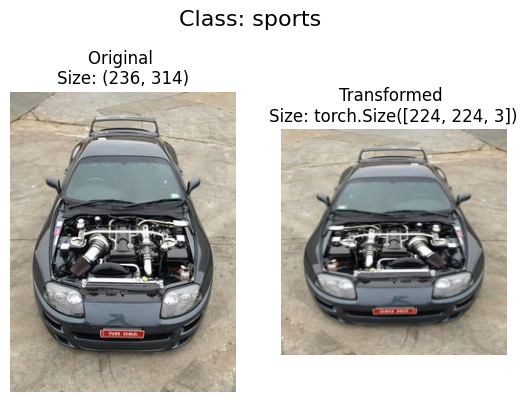

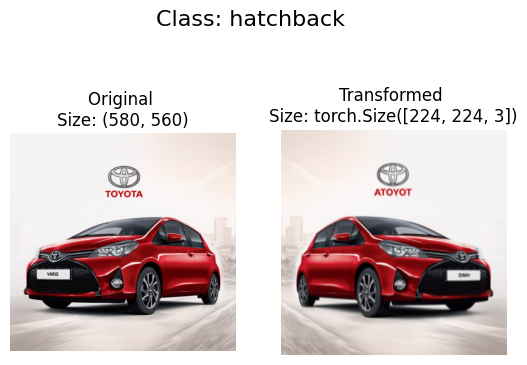

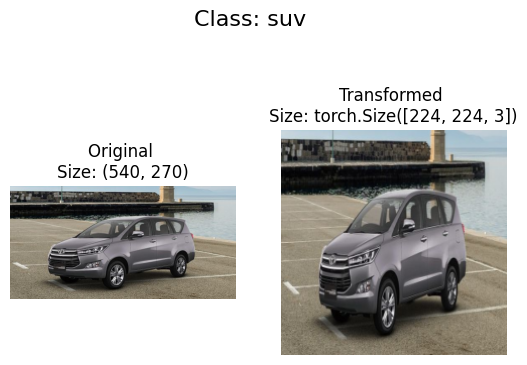

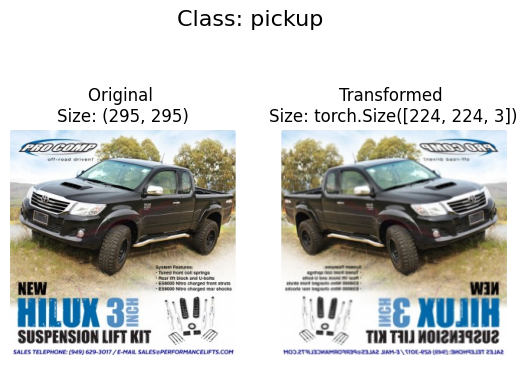

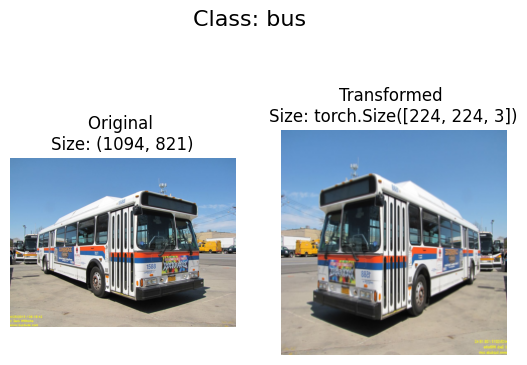

In [20]:
def plot_transformed_images(image_paths, transform, n=3, seed=42):
    random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(1, 2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original \nSize: {f.size}")
            ax[0].axis("off")

            transformed_image = transform(f).permute(1, 2, 0)
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
            ax[1].axis("off")

            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_path_list, transform=data_transform, n=5)

### ImageForder for Dataset

In [21]:
train_data = datasets.ImageFolder(root=train_dir, transform=data_transform, target_transform=None)
test_data = datasets.ImageFolder(root=test_dir, transform=data_transform)

print(f"Train data:\n{train_data}\nTest data:\n{test_data}")

Train data:
Dataset ImageFolder
    Number of datapoints: 3481
    Root location: /kaggle/working/car_dataset_split/training_images
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )
Test data:
Dataset ImageFolder
    Number of datapoints: 868
    Root location: /kaggle/working/car_dataset_split/testing_images
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )


In [22]:
class_names = train_data.classes
class_dict = train_data.class_to_idx
class_dict, class_names

({'bus': 0,
  'coupe': 1,
  'hatchback': 2,
  'mpv': 3,
  'pickup': 4,
  'sedan': 5,
  'sports': 6,
  'suv': 7,
  'truck': 8},
 ['bus',
  'coupe',
  'hatchback',
  'mpv',
  'pickup',
  'sedan',
  'sports',
  'suv',
  'truck'])

In [23]:
len(train_data), len(test_data)

(3481, 868)

### DataLoaders

In [24]:
train_dataloader = DataLoader(dataset=train_data, 
                              batch_size=8, # how many samples per batch?
                              num_workers=1, # how many subprocesses to use for data loading? (higher = more)
                              shuffle=True) # shuffle the data?

test_dataloader = DataLoader(dataset=test_data, 
                             batch_size=8, 
                             num_workers=1, 
                             shuffle=False) # don't usually need to shuffle testing data

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x78455d1ba050>,
 <torch.utils.data.dataloader.DataLoader at 0x78455c631610>)

In [25]:
height = 224 # H ("The training resolution is 224.")
width = 224 # W
color_channels = 3 # C
patch_size = 16 # P

# Calculate N (number of patches)
number_of_patches = int((height * width) / patch_size**2)
print(f"Number of patches (N) with image height (H={height}), width (W={width}) and patch size (P={patch_size}): {number_of_patches}")

Number of patches (N) with image height (H=224), width (W=224) and patch size (P=16): 196


In [26]:
embedding_layer_input_shape = (height, width, color_channels)

# Output shape
embedding_layer_output_shape = (number_of_patches, patch_size**2 * color_channels)

print(f"Input shape (single 2D image): {embedding_layer_input_shape}")
print(f"Output shape (single 2D image flattened into patches): {embedding_layer_output_shape}")

Input shape (single 2D image): (224, 224, 3)
Output shape (single 2D image flattened into patches): (196, 768)


In [27]:
image_batch, label_batch = next(iter(train_dataloader))

# Get a single image from the batch
image, label = image_batch[0], label_batch[0]

# View the batch shapes
image.shape, label

(torch.Size([3, 224, 224]), tensor(1))

In [28]:
plt.figure(figsize=(10,8))
plt.imshow(image.permute(1, 2, 0)) # rearrange image dimensions to suit matplotlib [color_channels, height, width] -> [height, width, color_channels]
plt.title(class_names[label])
plt.axis(False)
plt.show()

In [29]:
image_permuted = image.permute(1, 2, 0)

# Index to plot the top row of patched pixels
patch_size = 16
plt.figure(figsize=(patch_size, patch_size))
plt.imshow(image_permuted[:patch_size, :, :])
plt.show()

In [30]:
img_size = 224
patch_size = 16
num_patches = img_size/patch_size
assert img_size % patch_size == 0, "Image size must be divisible by patch size"
print(f"Number of patches per row: {num_patches}\nPatch size: {patch_size} pixels x {patch_size} pixels")

# Create a series of subplots
fig, axs = plt.subplots(nrows=1,
                        ncols=img_size // patch_size, # one column for each patch
                        figsize=(num_patches, num_patches),
                        sharex=True,
                        sharey=True)

# Iterate through number of patches in the top row
for i, patch in enumerate(range(0, img_size, patch_size)):
    axs[i].imshow(image_permuted[:patch_size, patch:patch+patch_size, :]); # keep height index constant, alter the width index
    axs[i].set_xlabel(i+1) # set the label
    axs[i].set_xticks([])
    axs[i].set_yticks([])

Number of patches per row: 14.0
Patch size: 16 pixels x 16 pixels


Number of patches per row: 14.0        
Number of patches per column: 14.0        
Total patches: 196.0        
Patch size: 16 pixels x 16 pixels


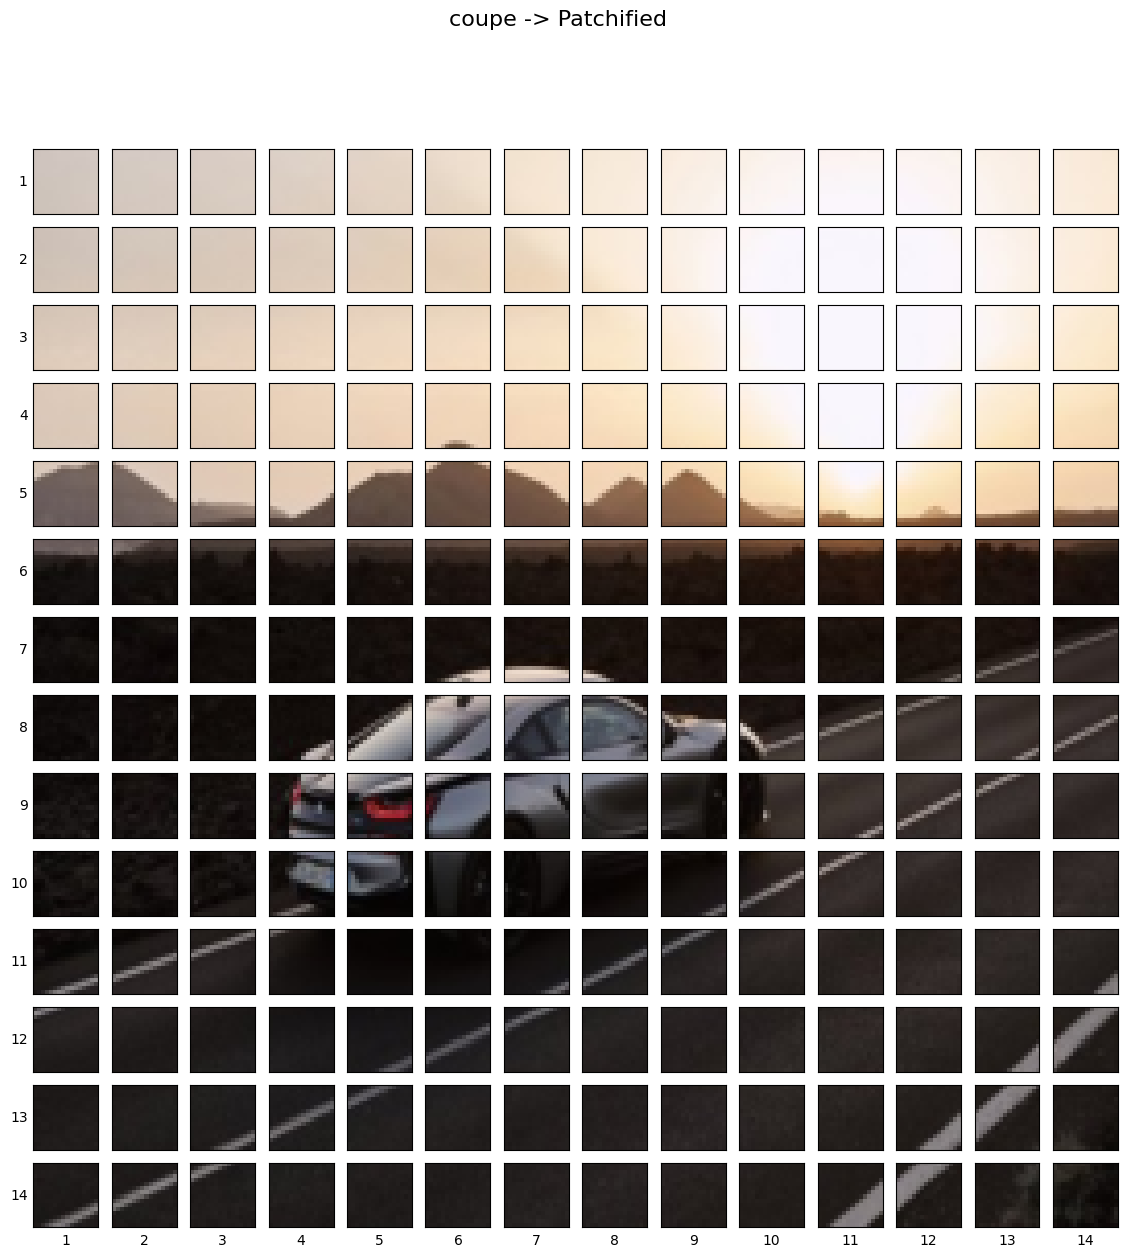

In [31]:
img_size = 224
patch_size = 16
num_patches = img_size/patch_size
assert img_size % patch_size == 0, "Image size must be divisible by patch size"
print(f"Number of patches per row: {num_patches}\
        \nNumber of patches per column: {num_patches}\
        \nTotal patches: {num_patches*num_patches}\
        \nPatch size: {patch_size} pixels x {patch_size} pixels")

# Create a series of subplots
fig, axs = plt.subplots(nrows=img_size // patch_size, # need int not float
                        ncols=img_size // patch_size,
                        figsize=(num_patches, num_patches),
                        sharex=True,
                        sharey=True)

# Loop through height and width of image
for i, patch_height in enumerate(range(0, img_size, patch_size)): # iterate through height
    for j, patch_width in enumerate(range(0, img_size, patch_size)): # iterate through width

        # Plot the permuted image patch (image_permuted -> (Height, Width, Color Channels))
        axs[i, j].imshow(image_permuted[patch_height:patch_height+patch_size, # iterate through height
                                        patch_width:patch_width+patch_size, # iterate through width
                                        :]) # get all color channels

        # Set up label information, remove the ticks for clarity and set labels to outside
        axs[i, j].set_ylabel(i+1,
                             rotation="horizontal",
                             horizontalalignment="right",
                             verticalalignment="center")
        axs[i, j].set_xlabel(j+1)
        axs[i, j].set_xticks([])
        axs[i, j].set_yticks([])
        axs[i, j].label_outer()

# Set a super title
fig.suptitle(f"{class_names[label]} -> Patchified", fontsize=16)
plt.show()

## ViT Building

In [32]:
from torchinfo import summary

### ViT Patch Emd to Pytorch

In [33]:

class PatchEmbedding(nn.Module):
    """Turns a 2D input image into a 1D sequence learnable embedding vector.

    Args:
        in_channels (int): Number of color channels for the input images. Defaults to 3.
        patch_size (int): Size of patches to convert input image into. Defaults to 16.
        embedding_dim (int): Size of embedding to turn image into. Defaults to 768.
    """
    # 2. Initialize the class with appropriate variables
    def __init__(self,
                 in_channels:int=3,
                 patch_size:int=16,
                 embedding_dim:int=768):
        super().__init__()

        # 3. Create a layer to turn an image into patches
        self.patcher = nn.Conv2d(in_channels=in_channels,
                                 out_channels=embedding_dim,
                                 kernel_size=patch_size,
                                 stride=patch_size,
                                 padding=0)

        # 4. Create a layer to flatten the patch feature maps into a single dimension
        self.flatten = nn.Flatten(start_dim=2, # only flatten the feature map dimensions into a single vector
                                  end_dim=3)

    # 5. Define the forward method
    def forward(self, x):
        # Create assertion to check that inputs are the correct shape
        image_resolution = x.shape[-1]
        assert image_resolution % patch_size == 0, f"Input image size must be divisible by patch size, image shape: {image_resolution}, patch size: {patch_size}"

        # Perform the forward pass
        x_patched = self.patcher(x)
        x_flattened = self.flatten(x_patched)
        # 6. Make sure the output shape has the right order
        return x_flattened.permute(0, 2, 1)

    
random_input_image = (1, 3, 224, 224)
random_input_image_error = (1, 3, 250, 250) # will error because image size is incompatible with patch_size

# # Get a summary of the input and outputs of PatchEmbedding (uncomment for full output)
summary(PatchEmbedding(),
        input_size=random_input_image, # try swapping this for "random_input_image_error"
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"])

Layer (type (var_name))                  Input Shape          Output Shape         Param #              Trainable
PatchEmbedding (PatchEmbedding)          [1, 3, 224, 224]     [1, 196, 768]        --                   True
├─Conv2d (patcher)                       [1, 3, 224, 224]     [1, 768, 14, 14]     590,592              True
├─Flatten (flatten)                      [1, 768, 14, 14]     [1, 768, 196]        --                   --
Total params: 590,592
Trainable params: 590,592
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 115.76
Input size (MB): 0.60
Forward/backward pass size (MB): 1.20
Params size (MB): 2.36
Estimated Total Size (MB): 4.17

In [34]:
# 1. Set patch size
patch_size = 16

# 2. Print shape of original image tensor and get the image dimensions
print(f"Image tensor shape: {image.shape}")
height, width = image.shape[1], image.shape[2]

# 3. Get image tensor and add batch dimension
x = image.unsqueeze(0)
print(f"Input image with batch dimension shape: {x.shape}")

# 4. Create patch embedding layer
patch_embedding_layer = PatchEmbedding(in_channels=3,
                                       patch_size=patch_size,
                                       embedding_dim=768)

# 5. Pass image through patch embedding layer
patch_embedding = patch_embedding_layer(x)
print(f"Patching embedding shape: {patch_embedding.shape}")

# 6. Create class token embedding
batch_size = patch_embedding.shape[0]
embedding_dimension = patch_embedding.shape[-1]
class_token = nn.Parameter(torch.ones(batch_size, 1, embedding_dimension),
                           requires_grad=True) # make sure it's learnable
print(f"Class token embedding shape: {class_token.shape}")

# 7. Prepend class token embedding to patch embedding
patch_embedding_class_token = torch.cat((class_token, patch_embedding), dim=1)
print(f"Patch embedding with class token shape: {patch_embedding_class_token.shape}")

# 8. Create position embedding
number_of_patches = int((height * width) / patch_size**2)
position_embedding = nn.Parameter(torch.ones(1, number_of_patches+1, embedding_dimension),
                                  requires_grad=True) # make sure it's learnable

# 9. Add position embedding to patch embedding with class token
patch_and_position_embedding = patch_embedding_class_token + position_embedding
print(f"Patch and position embedding shape: {patch_and_position_embedding.shape}")

Image tensor shape: torch.Size([3, 224, 224])
Input image with batch dimension shape: torch.Size([1, 3, 224, 224])
Patching embedding shape: torch.Size([1, 196, 768])
Class token embedding shape: torch.Size([1, 1, 768])
Patch embedding with class token shape: torch.Size([1, 197, 768])
Patch and position embedding shape: torch.Size([1, 197, 768])


### Attention Layer

In [35]:
class MultiheadSelfAttentionBlock(nn.Module):
    """Creates a multi-head self-attention block ("MSA block" for short).
    """
    # 2. Initialize the class with hyperparameters from Table 1
    def __init__(self,
                 embedding_dim:int=768, # Hidden size D from Table 1 for ViT-Base
                 num_heads:int=12, # Heads from Table 1 for ViT-Base
                 attn_dropout:float=0): # doesn't look like the paper uses any dropout in MSABlocks
        super().__init__()

        # 3. Create the Norm layer (LN)
        self.layer_norm = nn.LayerNorm(normalized_shape=embedding_dim)

        # 4. Create the Multi-Head Attention (MSA) layer
        self.multihead_attn = nn.MultiheadAttention(embed_dim=embedding_dim,
                                                    num_heads=num_heads,
                                                    dropout=attn_dropout,
                                                    batch_first=True) # does our batch dimension come first?

    # 5. Create a forward() method to pass the data through the layers
    def forward(self, x):
        x = self.layer_norm(x)
        attn_output, _ = self.multihead_attn(query=x, # query embeddings
                                             key=x, # key embeddings
                                             value=x, # value embeddings
                                             need_weights=False) # do we need the weights or just the layer outputs?
        return attn_output
multihead_self_attention_block = MultiheadSelfAttentionBlock(embedding_dim=768, # from Table 1
                                                             num_heads=12) # from Table 1

# Pass patch and position image embedding through MSABlock
patched_image_through_msa_block = multihead_self_attention_block(patch_and_position_embedding)
print(f"Input shape of MSA block: {patch_and_position_embedding.shape}")
print(f"Output shape MSA block: {patched_image_through_msa_block.shape}")

Input shape of MSA block: torch.Size([1, 197, 768])
Output shape MSA block: torch.Size([1, 197, 768])


### MLP Layer

In [36]:
class MLPBlock(nn.Module):
    """Creates a layer normalized multilayer perceptron block ("MLP block" for short)."""
    # 2. Initialize the class with hyperparameters from Table 1 and Table 3
    def __init__(self,
                 embedding_dim:int=768, # Hidden Size D from Table 1 for ViT-Base
                 mlp_size:int=3072, # MLP size from Table 1 for ViT-Base
                 dropout:float=0.1): # Dropout from Table 3 for ViT-Base
        super().__init__()

        # 3. Create the Norm layer (LN)
        self.layer_norm = nn.LayerNorm(normalized_shape=embedding_dim)

        # 4. Create the Multilayer perceptron (MLP) layer(s)
        self.mlp = nn.Sequential(
            nn.Linear(in_features=embedding_dim,
                      out_features=mlp_size),
            nn.GELU(), # "The MLP contains two layers with a GELU non-linearity (section 3.1)."
            nn.Dropout(p=dropout),
            nn.Linear(in_features=mlp_size, # needs to take same in_features as out_features of layer above
                      out_features=embedding_dim), # take back to embedding_dim
            nn.Dropout(p=dropout) # "Dropout, when used, is applied after every dense layer.."
        )

    # 5. Create a forward() method to pass the data through the layers
    def forward(self, x):
        x = self.layer_norm(x)
        x = self.mlp(x)
        return x
# Create an instance of MLPBlock
mlp_block = MLPBlock(embedding_dim=768, # from Table 1
                     mlp_size=3072, # from Table 1
                     dropout=0.1) # from Table 3

# Pass output of MSABlock through MLPBlock
patched_image_through_mlp_block = mlp_block(patched_image_through_msa_block)
print(f"Input shape of MLP block: {patched_image_through_msa_block.shape}")
print(f"Output shape MLP block: {patched_image_through_mlp_block.shape}")

Input shape of MLP block: torch.Size([1, 197, 768])
Output shape MLP block: torch.Size([1, 197, 768])


### Transformer Encoder

In [37]:
# 1. Create a class that inherits from nn.Module
class TransformerEncoderBlock(nn.Module):
    """Creates a Transformer Encoder block."""
    # 2. Initialize the class with hyperparameters from Table 1 and Table 3
    def __init__(self,
                 embedding_dim:int=768, # Hidden size D from Table 1 for ViT-Base
                 num_heads:int=12, # Heads from Table 1 for ViT-Base
                 mlp_size:int=3072, # MLP size from Table 1 for ViT-Base
                 mlp_dropout:float=0.1, # Amount of dropout for dense layers from Table 3 for ViT-Base
                 attn_dropout:float=0): # Amount of dropout for attention layers
        super().__init__()

        # 3. Create MSA block (equation 2)
        self.msa_block = MultiheadSelfAttentionBlock(embedding_dim=embedding_dim,
                                                     num_heads=num_heads,
                                                     attn_dropout=attn_dropout)

        # 4. Create MLP block (equation 3)
        self.mlp_block =  MLPBlock(embedding_dim=embedding_dim,
                                   mlp_size=mlp_size,
                                   dropout=mlp_dropout)

    # 5. Create a forward() method
    def forward(self, x):

        # 6. Create residual connection for MSA block (add the input to the output)
        x =  self.msa_block(x) + x

        # 7. Create residual connection for MLP block (add the input to the output)
        x = self.mlp_block(x) + x

        return x
transformer_encoder_block = TransformerEncoderBlock()

# # Print an input and output summary of our Transformer Encoder (uncomment for full output)
summary(model=transformer_encoder_block,
        input_size=(1, 197, 768), # (batch_size, num_patches, embedding_dimension)
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"])

Layer (type (var_name))                            Input Shape          Output Shape         Param #              Trainable
TransformerEncoderBlock (TransformerEncoderBlock)  [1, 197, 768]        [1, 197, 768]        --                   True
├─MultiheadSelfAttentionBlock (msa_block)          [1, 197, 768]        [1, 197, 768]        --                   True
│    └─LayerNorm (layer_norm)                      [1, 197, 768]        [1, 197, 768]        1,536                True
│    └─MultiheadAttention (multihead_attn)         --                   [1, 197, 768]        2,362,368            True
├─MLPBlock (mlp_block)                             [1, 197, 768]        [1, 197, 768]        --                   True
│    └─LayerNorm (layer_norm)                      [1, 197, 768]        [1, 197, 768]        1,536                True
│    └─Sequential (mlp)                            [1, 197, 768]        [1, 197, 768]        --                   True
│    │    └─Linear (0)                     

### ViT

In [38]:
class ViT(nn.Module):
    """Creates a Vision Transformer architecture with ViT-Base hyperparameters by default."""
    # 2. Initialize the class with hyperparameters from Table 1 and Table 3
    def __init__(self,
                 img_size:int=224, # Training resolution from Table 3 in ViT paper
                 in_channels:int=3, # Number of channels in input image
                 patch_size:int=16, # Patch size
                 num_transformer_layers:int=12, # Layers from Table 1 for ViT-Base
                 embedding_dim:int=768, # Hidden size D from Table 1 for ViT-Base
                 mlp_size:int=3072, # MLP size from Table 1 for ViT-Base
                 num_heads:int=12, # Heads from Table 1 for ViT-Base
                 attn_dropout:float=0, # Dropout for attention projection
                 mlp_dropout:float=0.1, # Dropout for dense/MLP layers
                 embedding_dropout:float=0.1, # Dropout for patch and position embeddings
                 num_classes:int=1000, # Default for ImageNet but can customize this
                 use_pretrained:bool=True, # NEW: Option to use pre-trained weights
                 pretrained_model:str='vit_base_patch16_224'): # NEW: Which pre-trained model to use
        super().__init__() # don't forget the super().__init__()!

        self.use_pretrained = use_pretrained
        
        if use_pretrained:
            # Load pre-trained ViT model from timm
            print(f"Loading pre-trained model: {pretrained_model}")
            self.pretrained_vit = timm.create_model(
                pretrained_model, 
                pretrained=True,
                num_classes=0,  # Remove classification head
                global_pool='token'  # Use class token for global pooling
            )
            
            # Get the feature dimension from the pre-trained model
            self.feature_dim = self.pretrained_vit.num_features
            
            # Create custom classification head for your car classes
            self.classifier = nn.Sequential(
                nn.LayerNorm(normalized_shape=self.feature_dim),
                nn.Dropout(mlp_dropout),
                nn.Linear(in_features=self.feature_dim,
                         out_features=num_classes)
            )
            
            # Initialize the classification head
            self._init_classification_head()
            
        else:
            # Use your original custom ViT implementation
            # 3. Make the image size is divisible by the patch size
            assert img_size % patch_size == 0, f"Image size must be divisible by patch size, image size: {img_size}, patch size: {patch_size}."

            # 4. Calculate number of patches (height * width/patch^2)
            self.num_patches = (img_size * img_size) // patch_size**2

            # 5. Create learnable class embedding (needs to go at front of sequence of patch embeddings)
            self.class_embedding = nn.Parameter(data=torch.randn(1, 1, embedding_dim),
                                                requires_grad=True)

            # 6. Create learnable position embedding
            self.position_embedding = nn.Parameter(data=torch.randn(1, self.num_patches+1, embedding_dim),
                                                   requires_grad=True)

            # 7. Create embedding dropout value
            self.embedding_dropout = nn.Dropout(p=embedding_dropout)

            # 8. Create patch embedding layer
            self.patch_embedding = PatchEmbedding(in_channels=in_channels,
                                                  patch_size=patch_size,
                                                  embedding_dim=embedding_dim)

            # 9. Create Transformer Encoder blocks (we can stack Transformer Encoder blocks using nn.Sequential())
            # Note: The "*" means "all"
            self.transformer_encoder = nn.Sequential(*[TransformerEncoderBlock(embedding_dim=embedding_dim,
                                                                                num_heads=num_heads,
                                                                                mlp_size=mlp_size,
                                                                                mlp_dropout=mlp_dropout) for _ in range(num_transformer_layers)])

            # 10. Create classifier head
            self.classifier = nn.Sequential(
                nn.LayerNorm(normalized_shape=embedding_dim),
                nn.Linear(in_features=embedding_dim,
                          out_features=num_classes)
            )

    def _init_classification_head(self):
        """Initialize the classification head with proper weights"""
        for m in self.classifier.modules():
            if isinstance(m, nn.Linear):
                nn.init.trunc_normal_(m.weight, std=0.02)
                if m.bias is not None:
                    nn.init.constant_(m.bias, 0)

    def freeze_backbone(self):
        """Freeze the pre-trained backbone for feature extraction only"""
        if self.use_pretrained:
            for param in self.pretrained_vit.parameters():
                param.requires_grad = False
        else:
            print("Warning: freeze_backbone() only works with pre-trained models")

    def unfreeze_backbone(self):
        """Unfreeze the backbone for fine-tuning"""
        if self.use_pretrained:
            for param in self.pretrained_vit.parameters():
                param.requires_grad = True
        else:
            print("Warning: unfreeze_backbone() only works with pre-trained models")

    # 11. Create a forward() method
    def forward(self, x):
        if self.use_pretrained:
            # Use pre-trained ViT backbone
            features = self.pretrained_vit(x)
            x = self.classifier(features)
            return x
        else:
            # Use original custom ViT implementation
            # 12. Get batch size
            batch_size = x.shape[0]

            # 13. Create class token embedding and expand it to match the batch size (equation 1)
            class_token = self.class_embedding.expand(batch_size, -1, -1) # "-1" means to infer the dimension (try this line on its own)

            # 14. Create patch embedding (equation 1)
            x = self.patch_embedding(x)

            # 15. Concat class embedding and patch embedding (equation 1)
            x = torch.cat((class_token, x), dim=1)

            # 16. Add position embedding to patch embedding (equation 1)
            x = self.position_embedding + x

            # 17. Run embedding dropout (Appendix B.1)
            x = self.embedding_dropout(x)

            # 18. Pass patch, position and class embedding through transformer encoder layers (equations 2 & 3)
            x = self.transformer_encoder(x)

            # 19. Put 0 index logit through classifier (equation 4)
            x = self.classifier(x[:, 0]) # run on each sample in a batch at 0 index

            return x




### Utils

In [39]:
# Updated model creation with pre-trained option
def create_vit_model(num_classes, use_pretrained=True, pretrained_model='vit_base_patch16_224'):
    """
    Create ViT model with option for pre-trained weights
    
    Args:
        num_classes: Number of classes for your car classification
        use_pretrained: Whether to use pre-trained weights (True) or train from scratch (False)
        pretrained_model: Which pre-trained model to use from timm
        
    Available pre-trained models:
    - 'vit_base_patch16_224': ViT-Base with 16x16 patches (recommended)
    - 'vit_large_patch16_224': ViT-Large with 16x16 patches
    - 'vit_small_patch16_224': ViT-Small with 16x16 patches
    """
    
    model = ViT(
        num_classes=num_classes,
        use_pretrained=use_pretrained,
        pretrained_model=pretrained_model
    )
    
    print(f"Created ViT model:")
    print(f"- Classes: {num_classes}")
    print(f"- Pre-trained: {use_pretrained}")
    if use_pretrained:
        print(f"- Pre-trained model: {pretrained_model}")
        print(f"- Feature dimension: {model.feature_dim}")
    
    return model

In [40]:
def setup_optimizer_for_pretrained(model, learning_rate=1e-4, weight_decay=1e-4):
    """
    Setup optimizer with different learning rates for pre-trained backbone and new head
    """
    if model.use_pretrained:
        # Different learning rates for pre-trained backbone and new head
        backbone_params = list(model.pretrained_vit.parameters())
        head_params = list(model.classifier.parameters())
        
        optimizer = torch.optim.AdamW([
            {'params': backbone_params, 'lr': learning_rate * 0.1},  # Lower LR for pre-trained
            {'params': head_params, 'lr': learning_rate}  # Higher LR for new head
        ], weight_decay=weight_decay)
        
        print(f"Using different learning rates:")
        print(f"- Backbone LR: {learning_rate * 0.1}")
        print(f"- Head LR: {learning_rate}")
        
    else:
        # Standard optimizer for custom model
        optimizer = torch.optim.Adam(params=model.parameters(), lr=learning_rate)
        print(f"Using standard learning rate: {learning_rate}")
    
    return optimizer

### Test Model ViT

In [41]:
print("\n" + "="*50)
print("CREATING VIT MODEL WITH PRE-TRAINED WEIGHTS")
print("="*50)

# Create model with pre-trained weights
vit = create_vit_model(
    num_classes=len(class_names), 
    use_pretrained=True,  # Set to False if you want to use your original custom implementation
    pretrained_model='vit_base_patch16_224'
)

# Move to device
device = "cuda" if torch.cuda.is_available() else "cpu"
vit = vit.to(device)

print(f"Model moved to device: {device}")

# For fine-tuning strategy, you can optionally freeze the backbone initially
# vit.freeze_backbone()  # Uncomment this line to freeze backbone for first few epochs

print("\n" + "="*50)
print("SETTING UP OPTIMIZER FOR TRAINING")
print("="*50)

# Setup optimizer with appropriate learning rates
if vit.use_pretrained:
    optimizer = setup_optimizer_for_pretrained(vit, learning_rate=1e-4)
else:
    optimizer = torch.optim.Adam(params=vit.parameters(), lr=0.001)

# Rest of your training code remains exactly the same!
print("Ready for training! Your existing training loop will work without changes.")


CREATING VIT MODEL WITH PRE-TRAINED WEIGHTS
Loading pre-trained model: vit_base_patch16_224


model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

Created ViT model:
- Classes: 9
- Pre-trained: True
- Pre-trained model: vit_base_patch16_224
- Feature dimension: 768
Model moved to device: cuda

SETTING UP OPTIMIZER FOR TRAINING
Using different learning rates:
- Backbone LR: 1e-05
- Head LR: 0.0001
Ready for training! Your existing training loop will work without changes.


In [42]:
summary(model=vit,
        input_size=(32, 3, 224, 224), # (batch_size, color_channels, height, width)
        # col_names=["input_size"], # uncomment for smaller output
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
)

Layer (type (var_name))                       Input Shape          Output Shape         Param #              Trainable
ViT (ViT)                                     [32, 3, 224, 224]    [32, 9]              --                   True
├─VisionTransformer (pretrained_vit)          [32, 3, 224, 224]    [32, 768]            152,064              True
│    └─PatchEmbed (patch_embed)               [32, 3, 224, 224]    [32, 196, 768]       --                   True
│    │    └─Conv2d (proj)                     [32, 3, 224, 224]    [32, 768, 14, 14]    590,592              True
│    │    └─Identity (norm)                   [32, 196, 768]       [32, 196, 768]       --                   --
│    └─Dropout (pos_drop)                     [32, 197, 768]       [32, 197, 768]       --                   --
│    └─Identity (patch_drop)                  [32, 197, 768]       [32, 197, 768]       --                   --
│    └─Identity (norm_pre)                    [32, 197, 768]       [32, 197, 768]       -

## Train and Test

In [43]:
def train_step(model: torch.nn.Module, 
               dataloader: torch.utils.data.DataLoader, 
               loss_fn: torch.nn.Module, 
               optimizer: torch.optim.Optimizer):
    # Put model in train mode
    model.train()
    
    # Setup train loss and train accuracy values
    train_loss, train_acc = 0, 0
    
    # Loop through data loader data batches
    for batch, (X, y) in enumerate(dataloader):
        # Send data to target device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate  and accumulate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item() 

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Calculate and accumulate accuracy metrics across all batches
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)

    # Adjust metrics to get average loss and accuracy per batch 
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc

In [44]:
def test_step(model: torch.nn.Module, 
              dataloader: torch.utils.data.DataLoader, 
              loss_fn: torch.nn.Module):
    # Put model in eval mode
    model.eval() 
    
    # Setup test loss and test accuracy values
    test_loss, test_acc = 0, 0
    
    # Turn on inference context manager
    with torch.inference_mode():
        # Loop through DataLoader batches
        for batch, (X, y) in enumerate(dataloader):
            # Send data to target device
            X, y = X.to(device), y.to(device)
    
            # 1. Forward pass
            test_pred_logits = model(X)

            # 2. Calculate and accumulate loss
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()
            
            # Calculate and accumulate accuracy
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))
            
    # Adjust metrics to get average loss and accuracy per batch 
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc

In [45]:
from tqdm.auto import tqdm

# 1. Take in various parameters required for training and test steps
def train(model: torch.nn.Module, 
          train_dataloader: torch.utils.data.DataLoader, 
          test_dataloader: torch.utils.data.DataLoader, 
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5):
    
    # 2. Create empty results dictionary
    results = {"train_loss": [],
        "train_acc": [],
        "test_loss": [],
        "test_acc": []
    }
    
    # 3. Loop through training and testing steps for a number of epochs
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer)
        test_loss, test_acc = test_step(model=model,
            dataloader=test_dataloader,
            loss_fn=loss_fn)
        
        # 4. Print out what's happening
        print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}"
        )

        # 5. Update results dictionary
        # Ensure all data is moved to CPU and converted to float for storage
        results["train_loss"].append(train_loss.item() if isinstance(train_loss, torch.Tensor) else train_loss)
        results["train_acc"].append(train_acc.item() if isinstance(train_acc, torch.Tensor) else train_acc)
        results["test_loss"].append(test_loss.item() if isinstance(test_loss, torch.Tensor) else test_loss)
        results["test_acc"].append(test_acc.item() if isinstance(test_acc, torch.Tensor) else test_acc)

    # 6. Return the filled results at the end of the epochs
    return results

### Training

In [ ]:
torch.manual_seed(42) 
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 50

device="cuda" if torch.cuda.is_available() else "cpu"

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=vit.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer 
start_time = timer()

# Train model_0 
results = train(model=vit, 
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        optimizer=optimizer,
                        loss_fn=loss_fn, 
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/50 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch: 1 | train_loss: 2.0132 | train_acc: 0.2101 | test_loss: 1.9405 | test_acc: 0.2294


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch: 2 | train_loss: 1.9434 | train_acc: 0.2208 | test_loss: 1.9267 | test_acc: 0.2282


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch: 3 | train_loss: 1.9313 | train_acc: 0.2142 | test_loss: 1.9164 | test_acc: 0.2328


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch: 4 | train_loss: 1.9414 | train_acc: 0.2342 | test_loss: 1.9457 | test_acc: 0.2294


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch: 5 | train_loss: 1.9269 | train_acc: 0.2285 | test_loss: 1.9201 | test_acc: 0.2282


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch: 6 | train_loss: 1.9210 | train_acc: 0.2219 | test_loss: 1.9214 | test_acc: 0.2282


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch: 7 | train_loss: 1.9191 | train_acc: 0.2245 | test_loss: 1.9214 | test_acc: 0.2282


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch: 8 | train_loss: 1.9253 | train_acc: 0.2302 | test_loss: 1.9216 | test_acc: 0.2282


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch: 9 | train_loss: 1.9240 | train_acc: 0.2288 | test_loss: 1.9338 | test_acc: 0.2133


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch: 10 | train_loss: 1.9213 | train_acc: 0.2147 | test_loss: 1.9228 | test_acc: 0.2294


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch: 11 | train_loss: 1.9202 | train_acc: 0.2314 | test_loss: 1.9258 | test_acc: 0.2133


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch: 12 | train_loss: 1.9208 | train_acc: 0.2325 | test_loss: 1.9192 | test_acc: 0.2294


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch: 13 | train_loss: 1.9196 | train_acc: 0.2285 | test_loss: 1.9202 | test_acc: 0.2282


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
